In [1]:
import autograd.numpy as np
import torch
import matplotlib.pyplot as plt
from pyDOE import lhs
from Handwritten_Deep_Multi_Gaussian import Multifidelity_GP
from sklearn.metrics import r2_score
%matplotlib inline  
np.random.seed(1234)

In [2]:
def Normalize(X, X_m, X_s):
    return (X-X_m)/(X_s)

In [3]:
N_H = 3
N_L = 8
D = 1
lb = 0.0*np.ones(D)
ub = 1.0*np.ones(D)
noise_L = 0.00
noise_H = 0.00

Normalize_input_data = 1
Normalize_output_data = 1

In [4]:
# Training data    
X_L = np.loadtxt('./dataset/x_train_low.txt').reshape(-1,32)
y_L = (np.loadtxt('./dataset/y_train_low.txt')*1e4).reshape(-1,1)

X_H = np.loadtxt('./dataset/x_train_high.txt').reshape(-1,32)
y_H = np.loadtxt('./dataset/y_train_high.txt').reshape(-1,1)

# Test data
X_star = np.loadtxt('./dataset/x_test_high.txt').reshape(-1,32)
y_star = np.loadtxt('./dataset/y_test_high.txt').reshape(-1,1)

 #  Normalize Input Data
if Normalize_input_data == 1:
    X = np.vstack((X_L,X_H))
#     X=X.T
    X_m = np.mean(X, axis = 0)
    X_s = np.std(X, axis = 0)   
    X_L = Normalize(X_L, X_m, X_s)
    X_H = Normalize(X_H, X_m, X_s)
    lb = Normalize(lb, X_m, X_s)
    ub = Normalize(ub, X_m, X_s)
    X_star = Normalize(X_star, X_m, X_s)

#  Normalize Output Data
if Normalize_output_data == 1:
    y = np.vstack((y_L,y_H))
#     y=y.T
    y_m = np.mean(y, axis = 0)
    y_s = np.std(y, axis = 0)   
    y_L = Normalize(y_L, y_m, y_s)
    y_H = Normalize(y_H, y_m, y_s)
    y_star = Normalize(y_star, y_m, y_s)
    

# # Plot the training data
# plt.figure(facecolor='w')
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif', size=16)
# plt.plot(X_H,y_H,'bo', markersize = 12, alpha = 0.5, label = "Data")
# plt.plot(X_L,y_L,'ms', markersize = 8, alpha = 0.5, label = "Data")
# plt.title("Training data")
# ax = plt.gca()
# # ax.set_xlim([lb[0], ub[0]])
# plt.xlabel('$x$')
# plt.ylabel('$f(x)$')

In [5]:
# Define model
X_L=X_L.reshape(-1,32)
X_H=X_H.reshape(-1,32)
y_L=y_L.reshape(-1,1)
y_H=y_H.reshape(-1,1)
feature_dim=5
print(X_L.shape)
print(X_H.shape)
print(y_L.shape)
print(y_H.shape)
model = Multifidelity_GP(X_L, y_L, X_H, y_H,feature_dim)



(1278, 32)
(21, 32)
(1278, 1)
(21, 1)
Total number of parameters: 15


In [6]:
# Train 
Learning_Rate=0.3
EPOCH=2000

optimizer=torch.optim.Adam(model.parameters(),lr=Learning_Rate)
loss_fn=torch.nn.CrossEntropyLoss()

AttributeError: 'Multifidelity_GP' object has no attribute 'parameters'

In [9]:
# print(X_star)
X_star=np.array(X_star).reshape(-1,32)
# print(X_star)

Relative L2 error u: 3.695671e-01
r2 socre: -0.6875029723202462


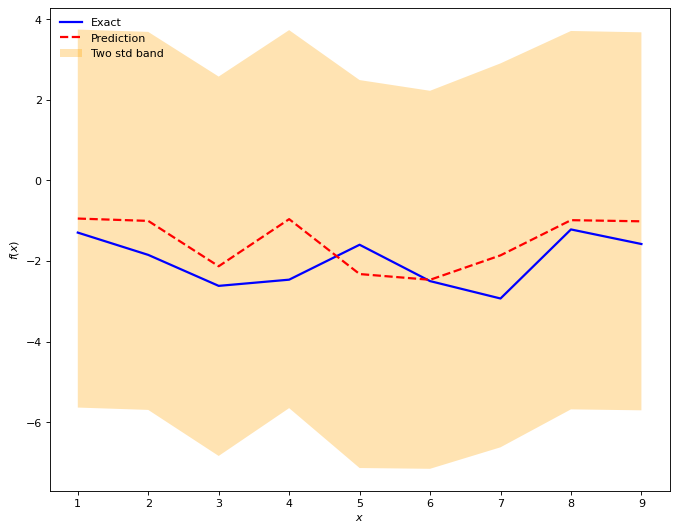

In [10]:
# Predict
X_star=np.array(X_star).reshape(-1,32)
y_pred, y_var = model.predict(y_pred, y_var = model.predict(X_star))
y_var = np.abs(np.diag(y_var))

y_pred-=2

# Check accuracy                       
error = np.linalg.norm(y_pred-y_star,2)/np.linalg.norm(y_star,2)
print("Relative L2 error u: %e" % (error))

# zipped = zip(X_star, y_star, y_pred)
# sort_zipped=sorted(zipped,key=lambda x:(x[0],x[1],x[2]))
# result=zip(*sort_zipped)
# X_star, y_star, y_pred=[list(x) for x in result]
# X_star=(np.array(X_star).reshape(-1)).tolist()
# y_star=(np.array(y_star).reshape(-1)).tolist()
# y_pred=(np.array(y_pred).reshape(-1)).tolist()

# print(X_star, y_star, y_pred)
index=[1,2,3,4,5,6,7,8,9]
y_pred=np.array(y_pred)
y_star=np.array(y_star)

print("r2 socre:",r2_score(y_star,y_pred))

# Plot
plt.figure(1, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif', size=12)


# plt.plot(X_star, y_star, 'b-', label = "Exact", linewidth=2)
# plt.plot(X_star, y_pred, 'r--', label = "Prediction", linewidth=2)
plt.plot(index, y_star, 'b-', label = "Exact", linewidth=2)
plt.plot(index, y_pred, 'r--', label = "Prediction", linewidth=2)


lower = np.array(y_pred - 2.0*np.sqrt(y_var[:,None]))
upper = np.array(y_pred + 2.0*np.sqrt(y_var[:,None]))
index=np.array(index)
plt.fill_between(index.flatten(), lower.flatten(), upper.flatten(), 
                 facecolor='orange', alpha=0.3, label="Two std band")
# plt.plot(X_H,y_H,'bo', markersize = 1, label = "High-fidelity data")
# plt.plot(X_L,y_L,'ms', markersize = 1, label = "Low-fidelity data")
plt.legend(frameon=False,loc='upper left')
ax = plt.gca()
# ax.set_xlim([lb[0], ub[0]])
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.savefig("C://Users//Tllok.n//Desktop//multi-figure//GPTutorial-Multifidelity_regression.png")